# Расширенный фильтр Калмана (EFK)


Найти положение в одномерном пространстве для мобильного робота по известным значениям высоты, полученным с датчика
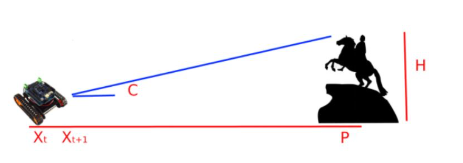

### Исходные данные
Состояние
$$
\mathbf{x}=\left[\begin{array}{c}
p \\
\frac{d p}{d t}=\dot{p}
\end{array}\right]
$$
вход управления  $\quad \mathbf{u}=a=\frac{d^{2} p}{d t^{2}}$
<br />

Модель движения
$$
\begin{aligned}
\mathbf{x}_{k} &=\mathbf{f}\left(\mathbf{x}_{k-1}, \mathbf{u}_{k-1}, \mathbf{w}_{k-1}\right) \\
&=\left[\begin{array}{cc}
1 & \Delta t \\
0 & 1
\end{array}\right] \mathbf{x}_{k-1}+\left[\begin{array}{c}
0 \\
\Delta t
\end{array}\right] \mathbf{u}_{k-1}+\mathbf{w}_{k-1} \\
v_{k} & \sim \mathscr{N}(0,0.01) \quad \mathbf{w}_{k} \sim \mathscr{N}\left(\mathbf{0},(0.1) \mathbf{1}_{2 \times 2}\right)
\end{aligned}
$$

Модель измерения
$$
\begin{aligned}
y_{k} &=\phi_{k}=h\left(p_{k}, v_{k}\right) \\
&=\tan ^{-1}\left(\frac{S}{D-p_{k}}\right)+v_{k}
\end{aligned}
$$

Якобиан модели движения
$$
\begin{array}{l}
\mathbf{F}_{k-1}=\left.\frac{\partial \mathbf{f}}{\partial \mathbf{x}_{k-1}}\right|_{\hat{\mathbf{x}}_{k-1}, \mathbf{u}_{k-1}, \mathbf{0}}=\left[\begin{array}{cc}
1 & \Delta t \\
0 & 1
\end{array}\right] \\
\mathbf{L}_{k-1}=\left.\frac{\partial \mathbf{f}}{\partial \mathbf{w}_{k-1}}\right|_{\hat{\mathbf{x}}_{k-1, \mathbf{u}_{k-1}, \mathbf{0}}}=\mathbf{1}_{2 \times 2}
\end{array}
$$

Якобиан модели измерения
$$
\begin{array}{l}
\mathbf{H}_{k}=\left.\frac{\partial h}{\partial \mathbf{x}_{k}}\right|_{\check{x}_{k}, \mathbf{0}}=\left[\begin{array}{ll}
\frac{S}{\left(D-\check{p}_{k}\right)^{2}+S^{2}} & 0
\end{array}\right] \\
M_{k}=\left.\frac{\partial h}{\partial v_{k}}\right|_{\check{x}_{k}, \mathbf{0}}=1
\end{array}
$$

Необходимо найти положение объекта в момент
времени 𝒌 + 𝟏, при ∆𝒕 = 𝟎. 𝟓 сек

$$
\begin{array}{cl}
\hat{\mathbf{x}}_{0} \sim \mathscr{N}\left(\left[\begin{array}{l}
0 \\
5
\end{array}\right],\right. & \left.\left[\begin{array}{cc}
0.01 & 0 \\
0 & 1
\end{array}\right]\right) \\
u_{0}=-2\left[\mathrm{~м} / \mathrm{с}^{2}\right] & y_{1}=\pi / 6[\mathrm{рад.}] \\
S=20[\mathrm{~м}] & D=40[\mathrm{~м}]
\end{array}
$$

In [ ]:
import numpy as np
from numpy.linalg import inv
import matplotlib.pyplot as plt

Змечание: мы линеризуем модель движения относительно предыдущей оценки, а модель измерения линеаризуем относительно предсказанного состояния.

In [ ]:
x_0 = np.array([[0],[5]])
P_0 = np.array([[0.01 , 0],
                [0, 1]]) #ковариация в моментв ремени 0
L_0 = np.array([[1 ,0],[0,1]])
M = 1
R = 0.01
Q_0 = 0.1*L_0
u_0 = -2
y1 = np.pi/6
S = 20
D = 40
dt = 0.5
F = np.array([[1,dt],[0,1]])
G = np.array([[0], [dt]])
x_pred = np.dot(F,x_0) + np.dot(G,u_0)
y_pred = np.atan(S/(D-x_pred[0][0]))
print("x_pred = ", x_pred)
P_pred = np.dot(F.dot(P_0),F.T) + np.dot(L_0.dot(Q_0),L_0.T)
print("P_pred = ", P_pred)
H =  np.array([0.011,0]).reshape(1,2)
K = P_pred.dot(H.T) / (np.dot(H.dot(P_pred),H.T) + 1*0.01*1 ) #коэффициент усиления
print("K = ", K)
x_k = x_pred + K.dot(y1 - y_pred) #уточнить насчет y-pred
print("x_k = ",x_k)
P_k = (L_0 - K.dot(H)).dot(P_pred)
print("P_k = ", P_k)

x_pred =  [[2.5]
 [4. ]]
P_pred =  [[0.36 0.5 ]
 [0.5  1.1 ]]
K =  [[0.39428251]
 [0.54761459]]
x_k =  [[2.51326423]
 [4.01842255]]
P_k =  [[0.35843864 0.49783145]
 [0.49783145 1.09698812]]


### Модель измерения уже другая!!!
Далее необходимо внести правки

## Фильтрация для интервала от 0 до 20 сек с интервалом измерений 0,1 сек
Для самостоятельного выполнения

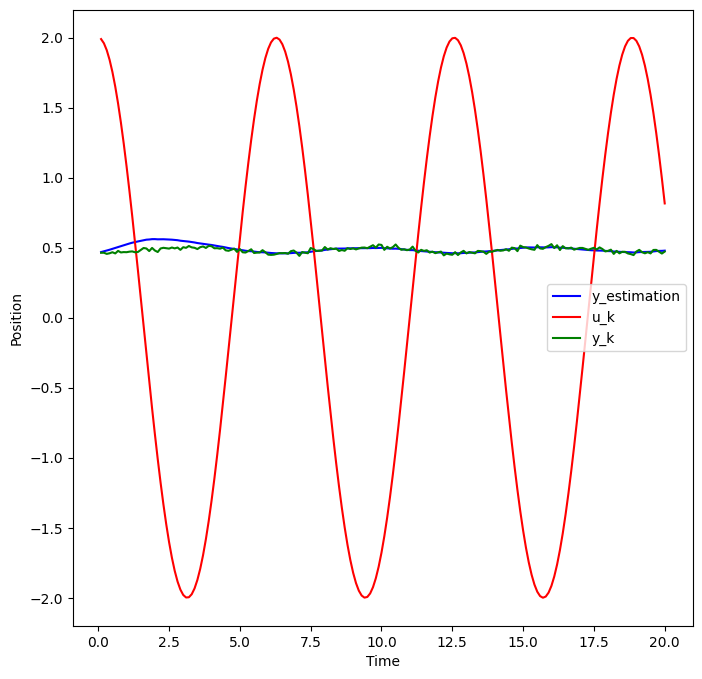

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Начальные условия те же самые
y_k = np.array([0.46364761, 0.46394331, 0.45583792, 0.4602238 , 0.46756375,
       0.4591102 , 0.47721062, 0.46612852, 0.4686494 , 0.46785832,
       0.47167686, 0.47346588, 0.46724847, 0.46946143, 0.48393537,
       0.49785568, 0.49436255, 0.47591332, 0.49836541, 0.47975576,
       0.46921458, 0.49445381, 0.49922302, 0.49645678, 0.49357358,
       0.501212  , 0.49515677, 0.50119725, 0.48464343, 0.50344966,
       0.49899733, 0.51208231, 0.50237515, 0.49932464, 0.49032495,
       0.50360651, 0.50900636, 0.49826695, 0.51304355, 0.51059352,
       0.49593827, 0.49665214, 0.49291056, 0.50055505, 0.48112357,
       0.47786448, 0.4851439 , 0.49323178, 0.47000781, 0.49015249,
       0.46713393, 0.46538848, 0.47627175, 0.48876572, 0.46216271,
       0.464675  , 0.46566391, 0.48231029, 0.46755605, 0.45045919,
       0.44866864, 0.45022331, 0.45520167, 0.46130849, 0.46091407,
       0.46192362, 0.45670061, 0.47510626, 0.47992042, 0.46464416,
       0.44155747, 0.46904419, 0.46424043, 0.46034005, 0.49771157,
       0.48968221, 0.47741036, 0.47852992, 0.47960862, 0.504725  ,
       0.48697798, 0.49645626, 0.49051927, 0.49385507, 0.47679961,
       0.48337983, 0.47792191, 0.49634281, 0.49064312, 0.49576065,
       0.48777255, 0.49498115, 0.50050901, 0.50120332, 0.49648318,
       0.5074984 , 0.51781   , 0.50036942, 0.52283242, 0.51999238,
       0.48467598, 0.50661311, 0.4945695 , 0.50373067, 0.52297719,
       0.49907473, 0.48514468, 0.48860006, 0.48219729, 0.48734352,
       0.50785521, 0.47830531, 0.46575892, 0.48477269, 0.47698408,
       0.48187168, 0.46530466, 0.47216747, 0.46088462, 0.46716672,
       0.47205074, 0.44519855, 0.45810714, 0.45256183, 0.44939034,
       0.46813864, 0.44761071, 0.46615725, 0.47755918, 0.45936484,
       0.46908277, 0.4647162 , 0.45980925, 0.47726808, 0.47526772,
       0.47133883, 0.45591039, 0.4717358 , 0.47087716, 0.47826038,
       0.48405034, 0.47820262, 0.48060574, 0.48912961, 0.47795688,
       0.50044905, 0.49672829, 0.47546591, 0.51457344, 0.50430181,
       0.50157352, 0.4943448 , 0.48872947, 0.48489598, 0.51833268,
       0.49476484, 0.49198603, 0.50433654, 0.5131182 , 0.52556212,
       0.49725721, 0.51751351, 0.48324941, 0.51120503, 0.49552137,
       0.49530067, 0.50065846, 0.48592232, 0.49253784, 0.49830319,
       0.4982004 , 0.49167788, 0.48487954, 0.49273569, 0.49923772,
       0.48737133, 0.50204233, 0.49061747, 0.47343416, 0.47757172,
       0.48589561, 0.45552238, 0.47729664, 0.45981954, 0.47062769,
       0.4707351 , 0.45901407, 0.45430863, 0.44726424, 0.47282602,
       0.48452456, 0.46796024, 0.45991716, 0.46792978, 0.4592391 ,
       0.48387024, 0.48451465, 0.47175257, 0.45830816, 0.47226228])
x_0 = np.array([[0],[5]])
P_0 = np.array([[0.01 , 0],
                [0, 1]]) #ковариация в моментв ремени 0

#массив для хранения истории переменной состояния x
x_k = np.zeros((len(y_k) + 1, 2, 1))  # (201, 2, 1)
x_k[0] = x_0  # Начальное условие
#массив для хранения истории переменной состояния P
P_k = np.zeros((len(y_k) + 1,2,2))
P_k[0] = P_0
#массив для хранения управляющих сигналов
u_k = np.zeros(len(y_k))
#Условия  для начала цикла
t_time = np.arange(0.1, 20.1, 0.1)
N = t_time.shape[0]

# #setup motion modelling
for i in range(1,N+1):
  dt = 0.1
  #print('iteration number ', i, 'curent time ', 0.1*i)
  #x_k, P_k = motion_iterate(dt, x_k, u_k, P_k,i,y_k)
  L = np.array([[1 ,0],[0,1]])
  M = 1
  R = 0.01
  Q = 0.1*L
  S = 20
  D = 40
  u_k[i-1] = np.cos(dt*i) * 2
  y_pred = np.atan(S/(D-x_k[i-1]))[0]
  F = np.array([[1,dt],[0,1]])
  G = np.array([[0], [dt]])
  x_pred = np.dot(F,x_k[i-1]) + np.dot(G,u_k[i-1])
  P_pred = np.dot(F.dot(P_k[i-1]),F.T) + np.dot(L.dot(Q),L.T)
  #H =  np.array([S/((D-x_k[i-1][0][0])**2 + S**2),0]).reshape(1,2)
  H =  np.array([S/((D-x_pred[0][0])**2 + S**2),0]).reshape(1,2)
  K = P_pred.dot(H.T) / (np.dot(H.dot(P_pred),H.T) + M*R*M ) #коэффициент усиления
  x_k[i] = x_pred + K * (y_k[i-1] - y_pred) #уточнить насчет y-pred
  P_k[i] = (L - K.dot(H)).dot(P_pred)


# plt.figure(figsize=(8, 8))

y_k_estimated = np.zeros(len(t_time))
for i in range(1, N+1):
    p_k = x_k[i, 0, 0]  # Текущее положение из x_k
    y_k_estimated[i-1] = np.arctan(S / (D - p_k))  # Формула из условия




plt.figure(figsize=(8, 8))
# plt.plot(t_time[:],x_k_hat[:,0], color='b')
#plt.scatter(t_time, x_k[1:, 0, 0], color='b', label='Position (x_k[0])')# оценка
# График положения оцененного положения
plt.plot(t_time, y_k_estimated, color='b', label='Position (y_estimated)')
plt.plot(t_time[:],u_k, color='r')
plt.plot(t_time[:],y_k, color='g')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend(['y_estimation', 'u_k', 'y_k'])
plt.show()


plt.figure(figsize=(8, 8))
# plt.plot(t_time[:],x_k_hat[:,0], color='b')
#plt.scatter(t_time, x_k[1:, 0, 0], color='b', label='Position (x_k[0])')# оценка
# График положения оцененного положения
plt.plot(t_time, y_k_estimated, color='b', label='Position (y_estimated)')
plt.plot(t_time[:],u_k, color='r')
plt.plot(t_time[:],y_k, color='g')
plt.xlabel('Time')
plt.ylabel('Position')
plt.legend(['y_estimation', 'u_k', 'y_k'])
plt.show()


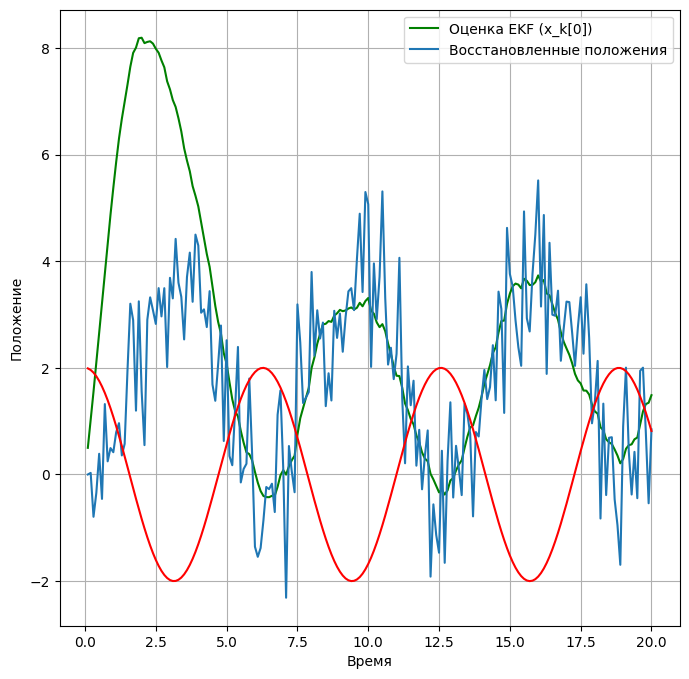

In [ ]:
x_k_reconstructed = np.zeros(len(y_k))
for i in range(len(y_k)):
    y = y_k[i]
    if np.abs(y) < np.pi/2:  # Исключаем деление на ноль (когда y = ±90°)
        x_k_reconstructed[i] = D - (S / np.tan(y))
    else:
        x_k_reconstructed[i] = np.nan  # Некорректные значения (можно заменить на D или другое)

plt.figure(figsize=(8, 8))
plt.plot(t_time, x_k[1:, 0, 0], 'g-', label='Оценка EKF (x_k[0])')
plt.plot(t_time, x_k_reconstructed, label='Восстановленные положения')
plt.plot(t_time[:],u_k, color='r')
plt.xlabel('Время')
plt.ylabel('Положение')
plt.legend()
plt.grid(True)
plt.show()